In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
df = pd.read_csv("forest/forestfire-main/dataset/Algerian_forest_fires_cleaned_dataset.csv")

In [144]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [145]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [146]:
df.drop(['day','month','year'], axis=1 ,inplace = True)

In [147]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [148]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [149]:
# predict FWI using rest

In [150]:
X = df.drop('FWI',axis =1 )

In [151]:
y = df['FWI']

In [152]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [154]:
X_train.corr()
X_test.shape

(61, 11)

<Axes: >

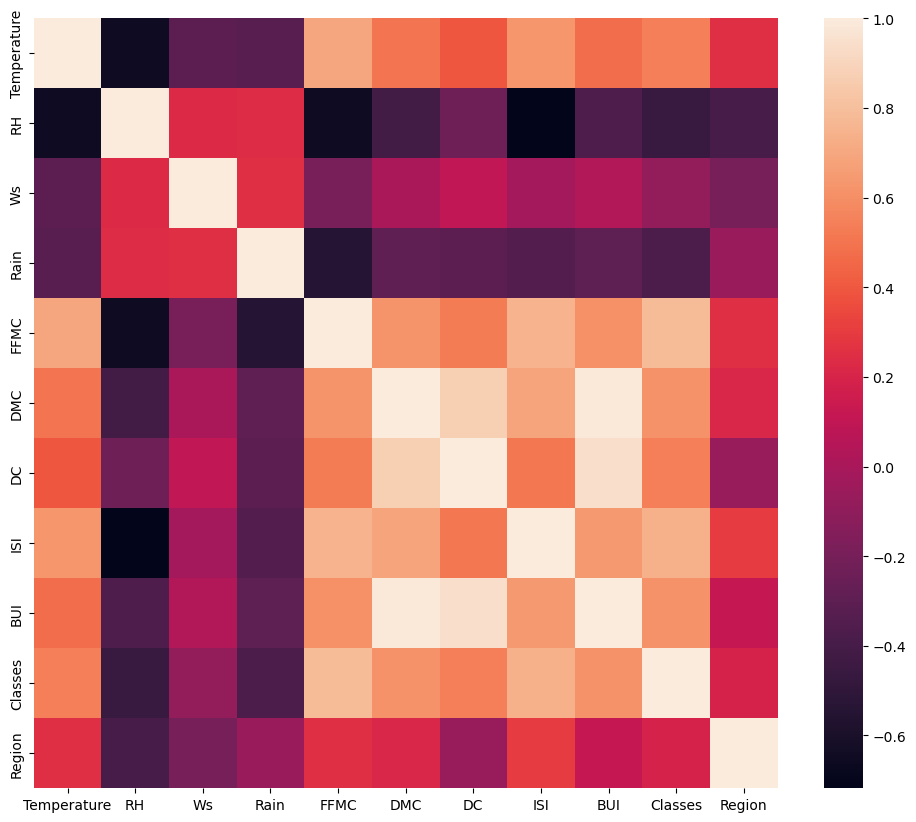

In [155]:
plt.figure(figsize = (12,10))
sns.heatmap(X_train.corr())

In [156]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i][j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [157]:
corr_features = correlation(X_train,0.85)

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_16696\4123493165.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_matrix.iloc[i][j]) > threshold:


In [158]:
corr_features

{'BUI', 'DC'}

In [159]:
X_train.drop(corr_features, axis =1 ,inplace = True)

In [160]:
X_test.drop(corr_features, axis =1 ,inplace = True)

In [161]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [162]:
#standarsization

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
# box plot to see the effort of standard scaler
X_train = X_train.to_numpy()

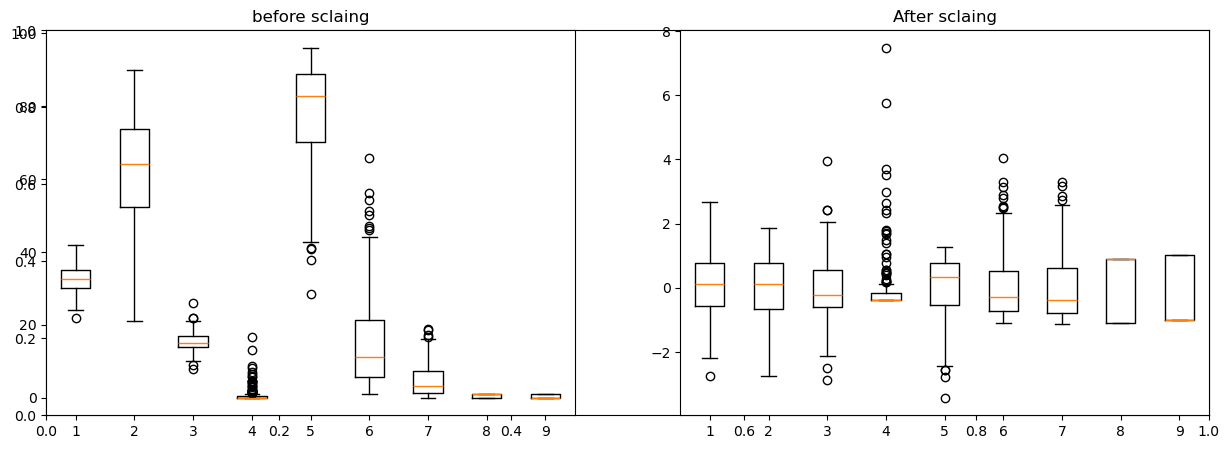

In [165]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.title("before sclaing")

plt.subplot(1,2,2)
plt.boxplot(X_train_scaled)
plt.title("After sclaing")
plt.show()

In [166]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

In [167]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("mean sbsolut",mae)
print("r2", score)

mean sbsolut 0.5468236465249977
r2 0.9847657384266952


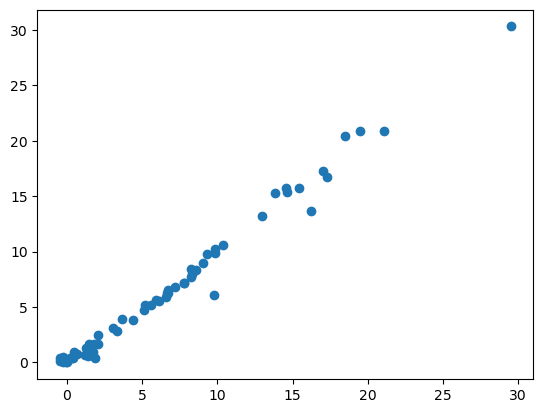

In [169]:
plt.scatter(y_pred,y_test)

In [172]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean abs error", mae)
print("r2 score", score)

mean abs error 61.96651017059035
r2 score -120.38092369409154


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


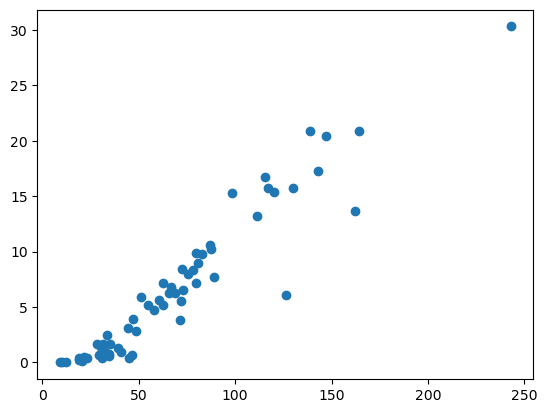

In [173]:
plt.scatter(y_pred,y_test)

In [177]:
## cv with lasso regression
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv= 5)

In [179]:
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

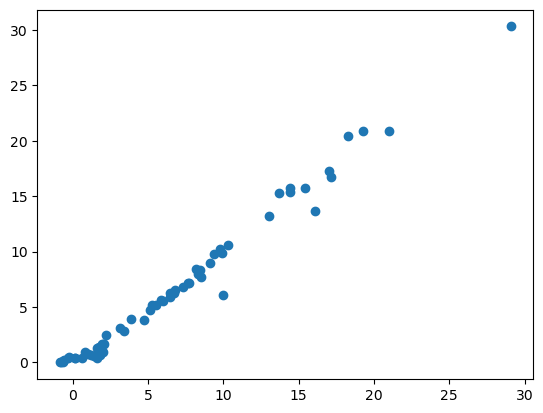

In [181]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_pred,y_test)

In [183]:
mae = mean_absolute_error(y_pred,y_test)
mae

0.6199701158263436

In [184]:
score = r2_score(y_pred,y_test)
score

0.980851982434192

mean absolute error 0.5642305340105683
r2_score 0.9842993364555513


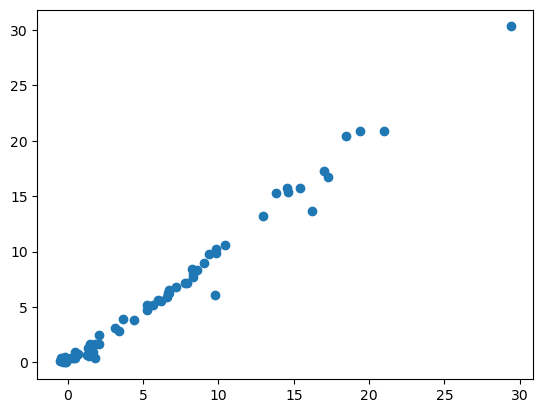

In [189]:
# ridge regression 
# r2 regulzaied
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print("mean absolute error", mean_absolute_error(y_pred,y_test))
print("r2_score",r2_score(y_test,y_pred))
plt.scatter(y_pred,y_test)

mae 0.5642305340105683
r2 score 0.9842993364555513


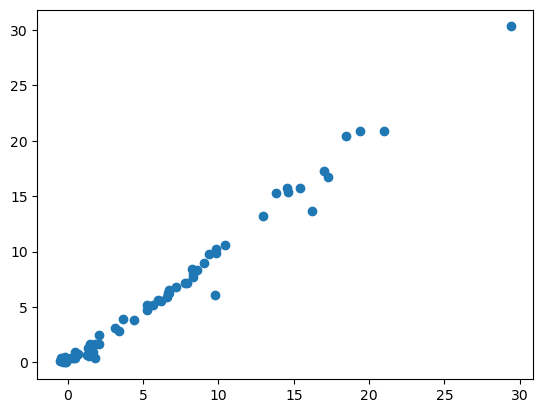

In [195]:
## ridge cv
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_pred,y_test)
print("mae", mean_absolute_error(y_test, y_pred))
print("r2 score" , r2_score(y_test, y_pred))

In [196]:
#used params 
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [ ]:
# combination of l2 and l1 
from sklearn.linear_model import ElasticNet
